In [110]:
CHROMATIN_REGIONS = ['Promoter', 'Enhancer', 'Transcribed', 'ZNF', 'Inactive', 'Quiescent']
#CHROMATIN_REGIONS = ['Active', 'Inactive', 'Silent']

In [111]:
import numpy as np
import collections
import json

import matplotlib.pyplot as plt
#plt.switch_backend('agg')
import matplotlib
import sys
sys.path.append('../')
from utils import utils
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 22, colors = 'banskt', dpi = 72)

In [112]:
import pandas as pd
resfile = "../cre_enrichment/chromhmm/all_tissues.txt"
datadf = pd.read_table(resfile, index_col=0)

In [120]:
datalist = [np.array(datadf[datadf.N_TRANSEQTLS > 50][x.upper()]) for x in CHROMATIN_REGIONS]

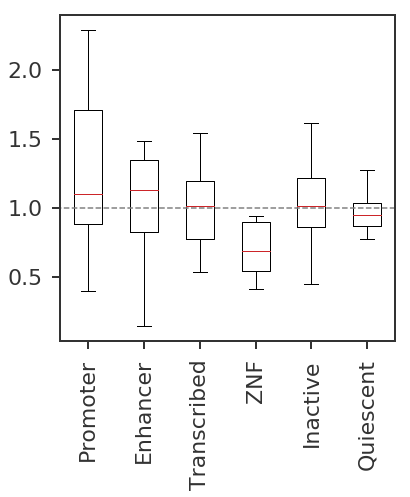

In [122]:
fig = plt.figure(figsize = (6, 6))
ax1 = fig.add_subplot(111)
X_nonan = [x[~np.isnan(x)] for x in datalist]
X_nonan_nozero = [x[x > 0] for x in X_nonan]
ax1.boxplot(X_nonan_nozero, showfliers=False)
ax1.set_xticklabels(CHROMATIN_REGIONS, rotation='vertical')
xmax = len(CHROMATIN_REGIONS) + 1
ax1.plot([0, xmax], [1., 1.], ls = 'dashed', color = 'gray')

#outfile = f'../plots/tissue_specific_cis_regulatory_elements.png'
#plt.savefig(outfile, bbox_inches='tight')
plt.show()